In [42]:
# import required libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import statistics
import plotly.express as px
import researchpy as rp
import pylab
import statsmodels.api as sm
import math
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy.stats import kstest
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportion_confint
from IPython.display import Markdown, display
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score, confusion_matrix, roc_auc_score, classification_report, log_loss

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matches = pd.read_csv("matches_prem_v2.csv", index_col=0)

In [4]:
matches.shape

(3800, 30)

In [5]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,season,team,wwages,awages,age
0,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,1.0,18.7,1.0,1.0,1.0,2023,Manchester City,3745000,194740000,27.2
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,7.0,17.5,0.0,0.0,0.0,2023,Manchester City,3745000,194740000,27.2
2,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,10.0,16.2,1.0,0.0,0.0,2023,Manchester City,3745000,194740000,27.2
3,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,5.0,14.1,0.0,0.0,0.0,2023,Manchester City,3745000,194740000,27.2
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,...,9.0,14.8,0.0,0.0,0.0,2023,Manchester City,3745000,194740000,27.2


In [6]:
matches["team"].value_counts()

Manchester City             190
Crystal Palace              190
Southampton                 190
Leicester City              190
Everton                     190
Arsenal                     190
Wolverhampton Wanderers     190
Chelsea                     190
West Ham United             190
Manchester United           190
Tottenham Hotspur           190
Brighton and Hove Albion    190
Liverpool                   190
Newcastle United            190
Aston Villa                 152
Burnley                     152
Fulham                      114
Watford                     114
Leeds United                114
Bournemouth                 114
Brentford                    76
Norwich City                 76
Sheffield United             76
Nottingham Forest            38
West Bromwich Albion         38
Cardiff City                 38
Huddersfield Town            38
Name: team, dtype: int64

In [7]:
matches.isna().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       882
captain            0
formation          0
referee            0
match report       0
notes           3800
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
wwages             0
awages             0
age                0
dtype: int64

In [8]:
matches["round"].value_counts()

Matchweek 1     100
Matchweek 30    100
Matchweek 23    100
Matchweek 12    100
Matchweek 24    100
Matchweek 25    100
Matchweek 26    100
Matchweek 27    100
Matchweek 29    100
Matchweek 31    100
Matchweek 2     100
Matchweek 33    100
Matchweek 34    100
Matchweek 28    100
Matchweek 35    100
Matchweek 36    100
Matchweek 37    100
Matchweek 32    100
Matchweek 22    100
Matchweek 21    100
Matchweek 7     100
Matchweek 20    100
Matchweek 3     100
Matchweek 4     100
Matchweek 5     100
Matchweek 6     100
Matchweek 8     100
Matchweek 9     100
Matchweek 10    100
Matchweek 11    100
Matchweek 13    100
Matchweek 14    100
Matchweek 15    100
Matchweek 16    100
Matchweek 17    100
Matchweek 18    100
Matchweek 19    100
Matchweek 38    100
Name: round, dtype: int64

In [9]:
del matches["comp"]
del matches["notes"]

In [10]:
matches.loc[matches.attendance.isna()==True, 'attendance'] = round(matches.attendance.mean(), 0)

In [11]:
matches.loc[matches.dist.isna()==True, 'dist'] = round(matches.dist.mean(), 0)

In [12]:
matches.loc[matches.wwages.isna()==True, 'wwages'] = round(matches.wwages.mean(), 0)

In [13]:
matches.loc[matches.awages.isna()==True, 'awages'] = round(matches.awages.mean(), 0)

In [14]:
matches["target"] = (matches["result"] == "W").astype("int")

In [15]:
matches["date"] = pd.to_datetime(matches["date"])

In [16]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes

In [17]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [18]:
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

In [19]:
matches["day_code"] = matches["date"].dt.dayofweek

In [20]:
matches["captain_code"] = matches["captain"].astype("category").cat.codes
matches["referee_code"] = matches["referee"].astype("category").cat.codes

In [21]:
# matches["comp_code"] = matches["comp"].astype("category").cat.codes

In [22]:
# matches["round_code"] = matches["round"].astype("category").cat.codes

In [23]:
matches["formation_code"] = matches["formation"].astype("category").cat.codes

In [24]:
matches["age_int"] = (round(matches["age"], 0)).astype("int")

In [25]:
def categorize_wwages(wwages):
    if wwages > 2000000:
        return 1
    elif 1000000 < wwages <= 2000000:
        return 2
    else:
        return 3

In [26]:
def categorize_awages(awages):
    if awages > 150000000:
        return 1
    elif 75000000 < awages <= 150000000:
        return 2
    else:
        return 3

In [27]:
matches['wwages_category'] = matches['wwages'].apply(categorize_wwages)

In [28]:
matches['awages_category'] = matches['awages'].apply(categorize_awages)

In [29]:
predictors = ["venue_code", "opp_code", "hour", "day_code", "captain_code", "referee_code", "formation_code", "age_int", "wwages_category", "awages_category"]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(matches[predictors], matches['target'], test_size=0.2, stratify = matches['target'], random_state=42)

# X_train,X_test,y_train,y_test = train_test_split(matches_rolling[predictors], matches_rolling['target'], test_size=0.2, stratify = matches_rolling['target'], random_state=42)

train = matches[matches["date"] < '2023-01-20']
test = matches[matches["date"] > '2023-01-20']

In [31]:
test

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,venue_code,opp_code,hour,day_code,captain_code,referee_code,formation_code,age_int,wwages_category,awages_category
19,2023-01-22,14:00,Matchweek 21,Sun,Home,W,3,0,Wolves,2.8,...,1,26,14,6,173,7,1,27,1,1
20,2023-02-05,16:30,Matchweek 22,Sun,Away,L,0,1,Tottenham,1.3,...,0,22,16,6,91,1,17,27,1,1
21,2023-02-12,16:30,Matchweek 23,Sun,Home,W,3,1,Aston Villa,3.3,...,1,1,16,6,173,23,1,27,1,1
22,2023-02-15,19:30,Matchweek 12,Wed,Away,W,3,1,Arsenal,1.8,...,0,0,19,2,173,2,10,27,1,1
23,2023-02-18,15:00,Matchweek 24,Sat,Away,D,1,1,Nott'ham Forest,2.4,...,0,19,15,5,173,8,1,27,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2023-04-30,14:00,Matchweek 34,Sun,Away,L,1,3,Newcastle Utd,0.8,...,0,17,14,6,71,2,17,25,3,3
756,2023-05-08,20:00,Matchweek 35,Mon,Away,L,3,4,Nott'ham Forest,3.1,...,0,19,20,0,71,17,12,25,3,3
757,2023-05-13,15:00,Matchweek 36,Sat,Home,L,0,2,Fulham,0.4,...,1,10,15,5,71,28,12,25,3,3
758,2023-05-21,14:00,Matchweek 37,Sun,Away,L,1,3,Brighton,0.6,...,0,4,14,6,71,21,10,25,3,3


In [32]:
# dtree = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=42)

In [33]:
# start = 1.4
# end = 1.62
# step = 0.001

# result = []
# current_value = start

# while current_value <= end:
#     result.append(current_value)
#     current_value += step

In [44]:
classifiers = [
#     KNeighborsClassifier(2),
#     KNeighborsClassifier(3),
#     KNeighborsClassifier(4),
#     KNeighborsClassifier(5), ne valjaju ovi nikako
#     LogisticRegression(), svi su 61%, nema razlike
#     SVC(kernel="linear", C=0.025, probability=True),
#     SVC(kernel="linear", C=0.05, probability=True),
#     SVC(kernel="linear", C=0.075, probability=True),
#     SVC(gamma=2, C=1, probability=True),
#     SVC(gamma=1, C=1, probability=True),
#     SVC(gamma=2, C=2, probability=True),
#     SVC(gamma=1, C=2, probability=True),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     GaussianProcessClassifier(1.0 * RBF(1.1)),
#     GaussianProcessClassifier(1.0 * RBF(1.2)),
#     DecisionTreeClassifier(max_depth=4),
#     DecisionTreeClassifier(max_depth=5),
#     DecisionTreeClassifier(max_depth=6),
#     DecisionTreeClassifier(max_depth=8),
    ## n_estimators = 43 najbolji rez
    ## min_samples_split = 11 najbolji rez
    

#     AdaBoostClassifier(learning_rate=1.641, n_estimators=50, random_state=42) -> 0.7094240837696335
    
#     AdaBoostClassifier(learning_rate=1.544, n_estimators=52, random_state=42) -> 0.6894736842105263
    
#     AdaBoostClassifier(learning_rate=1.53, n_estimators=45, random_state=42) -> 0.6881578947368421

#     AdaBoostClassifier(learning_rate=1.55, n_estimators=52, random_state=42) -> 0.6855263157894737
    
#     AdaBoostClassifier(learning_rate=1.5, n_estimators=46, random_state=42) -> 0.6789473684210526
    
#     RandomForestClassifier(n_estimators=53, min_samples_split=11, random_state=42, max_depth=9) -> 0.6710526315789473
    
#     min_samples_split=14, random_state=42, max_depth=13)
#     min_samples_split=14, random_state=42, max_depth=14)    
    
#     AdaBoostClassifier(learning_rate=1.3164, n_estimators=61, random_state=42) -> 0.7072538860103627
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']

#     AdaBoostClassifier(learning_rate=1.3624, n_estimators=45, random_state=42) -> 0.7046632124352331
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']
    
#     AdaBoostClassifier(learning_rate=1.364, n_estimators=45, random_state=42) -> 0.7020725388601037
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']
      
    AdaBoostClassifier(n_estimators=45, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=46, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=47, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=48, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=49, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=51, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=52, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=53, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=54, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=55, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=56, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=57, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=58, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=59, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=60, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=61, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=62, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=63, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=64, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=65, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=66, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=67, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=68, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=69, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=70, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=71, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=72, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=73, random_state=42, learning_rate=1.641),
    AdaBoostClassifier(n_estimators=74, random_state=42, learning_rate=1.641)   
    
#     AdaBoostClassifier(n_estimators=72, random_state=42, learning_rate=1.6119999999999766) -> 0.6989528795811518
    
#     RandomForestClassifier(max_depth=10, n_estimators=15, max_features=1),
#     RandomForestClassifier(max_depth=12, n_estimators=20, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     MLPClassifier(alpha=1, max_iter=1100),
#     MLPClassifier(alpha=1, max_iter=1200),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis()
]

In [45]:
precisions = []

In [46]:
estimators = []

In [47]:
accuracies = []

In [48]:
for clf in classifiers:
#         clf.fit(X_train, y_train)
        clf.fit(train[predictors], train["target"])
#         accuracy = clf.score(X_test, y_test)
        accuracy = accuracy_score(test["target"], clf.predict(test[predictors]))
        precision = precision_score(test["target"], clf.predict(test[predictors]))
#         mae = mean_absolute_error(test["target"], clf.predict(test[predictors]))
#         mse = mean_squared_error(test["target"], clf.predict(test[predictors]))
#         rmse = mean_squared_error(test["target"], clf.predict(test[predictors]), squared=False)

#         prediction_proba = clf.predict_proba(X_test)
#         logloss = log_loss(y_test,prediction_proba)
#         precision = score(y_test, prediction_proba)
#         conf_martrix = confusion_matrix(y_test, prediction_proba)
#         clas_report = classification_report(y_test, prediction_proba)
        estimators.append(clf.n_estimators)
        precisions.append(precision)
        accuracies.append(accuracy)
        print(clf.n_estimators, accuracy, precision)
#         print("MAE:", mae)
#         print("MSE:", mse)
#         print("RMSE:", rmse)
#         print("")

45 0.6727748691099477 0.591304347826087
46 0.6910994764397905 0.6166666666666667
47 0.6858638743455497 0.6101694915254238
48 0.7015706806282722 0.6290322580645161
49 0.6884816753926701 0.6134453781512605
50 0.7094240837696335 0.6446280991735537
51 0.6884816753926701 0.6115702479338843
52 0.6832460732984293 0.6016260162601627
53 0.6832460732984293 0.6016260162601627
54 0.6832460732984293 0.6016260162601627
55 0.680628272251309 0.5967741935483871
56 0.6780104712041884 0.592
57 0.6858638743455497 0.6048387096774194
58 0.6780104712041884 0.592
59 0.6832460732984293 0.6016260162601627
60 0.6780104712041884 0.5934959349593496
61 0.6910994764397905 0.6129032258064516
62 0.6727748691099477 0.584
63 0.6780104712041884 0.592
64 0.675392670157068 0.5873015873015873
65 0.6884816753926701 0.6115702479338843
66 0.6858638743455497 0.6065573770491803
67 0.680628272251309 0.6
68 0.680628272251309 0.6
69 0.675392670157068 0.5932203389830508
70 0.680628272251309 0.6
71 0.675392670157068 0.593220338983050

In [49]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=clf.predict(test[predictors])))

In [50]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,186,50
1,74,72


In [76]:
# grouped_matches = matches.groupby("team")

In [1744]:
# def rolling_averages(group, cols, new_cols):
#     group = group.sort_values("date") # sortiraj po datumu
#     rolling_stats = group[cols].rolling(3, closed='left').mean() # uzima mean rezultata od prethodna 3 matchweek-a
#     group[new_cols] = rolling_stats
#     group = group.dropna(subset=new_cols) # uklanja nedostajuce vrijednosti
#     return group

In [1745]:
# cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
# new_cols = [f"{c}_rolling" for c in cols]

# rolling averages uzima prosjecne vrijednosti ovih kolona u protekla 3 matchweek-a i na taj nacin predvidja ishod sljedeceg meca

In [1684]:
# matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [1685]:
# matches_rolling.shape

In [1686]:
# matches_rolling = matches_rolling.droplevel('team')

In [1683]:
# matches_rolling

In [1682]:
# matches_rolling.index = range(matches_rolling.shape[0])

In [1681]:
# matches_rolling

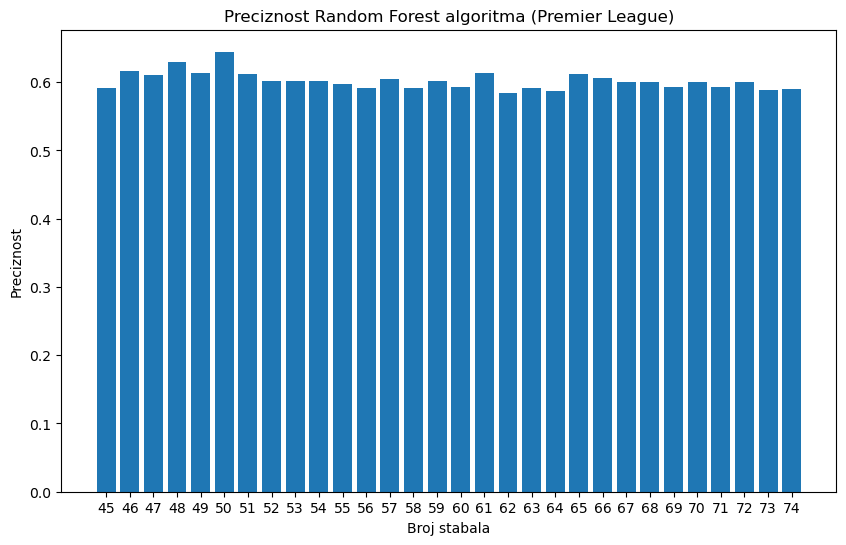

In [51]:
# # Visualize Precision
plt.figure(figsize=(10,6))
plt.bar(range(len(precisions)), precisions, tick_label=estimators)
plt.title("Preciznost Random Forest algoritma (Premier League)")
plt.xlabel("Broj stabala")
plt.ylabel("Preciznost")
plt.xticks()
plt.savefig("preciznost_ada_prem.png")
plt.show()

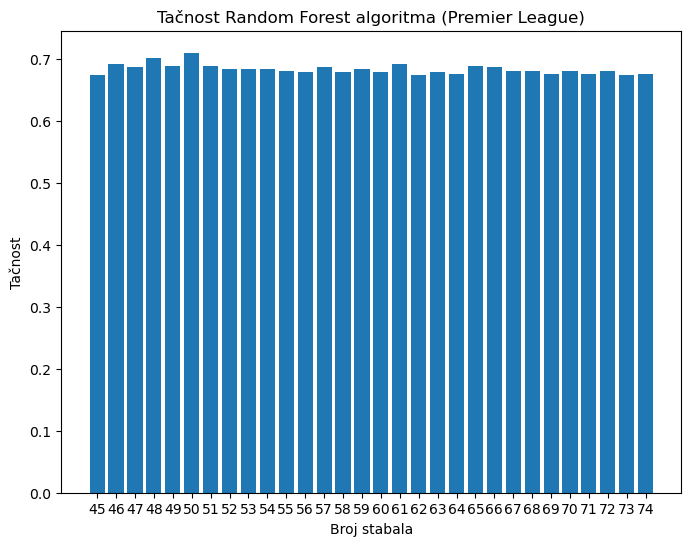

In [52]:
# # Visualize Accuracy
plt.figure(figsize=(8,6))
plt.bar(range(len(accuracies)), accuracies, tick_label=estimators)
plt.title("Tačnost Random Forest algoritma (Premier League)")
plt.xlabel("Broj stabala")
plt.ylabel("Tačnost")
plt.xticks()
plt.yticks()
plt.savefig("tacnost_ada_prem.png")
plt.show()